In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1) Data Exploration

In [25]:
data_path = "/mnt/c/Users/onurg/OneDrive/Masaüstü/codary-project/boston-task/data/housing.csv"
df = pd.read_csv(data_path)
print(f"Shape of the dataset is as follows: {df.shape}")

Shape of the dataset is as follows: (20640, 10)


In [26]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.1) Dataset Information

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 1.2) Missing Values

In [5]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### 1.3) Duplicates

In [6]:
df.duplicated().sum()

0

### 1.4) Data Types

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 1.5) Number of Unique Values

In [8]:
df.nunique()

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64

In [9]:
# ocean_proximty is the only categorical feature

feature = "ocean_proximity"
print(f"Categories in '{feature}' variable has the following counts:")
print(df[feature].value_counts())

Categories in 'ocean_proximity' variable has the following counts:
ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


## 2) Visualization

In [10]:
columns_set = set(df.columns)
target_variable = "median_house_value"

variables_to_remove = {target_variable, "ocean_proximity"}

columns_set = columns_set - variables_to_remove
columns_list = list(columns_set)
print(columns_list)

['population', 'housing_median_age', 'total_bedrooms', 'median_income', 'latitude', 'households', 'longitude', 'total_rooms']


### 2.1) Distribution of Features

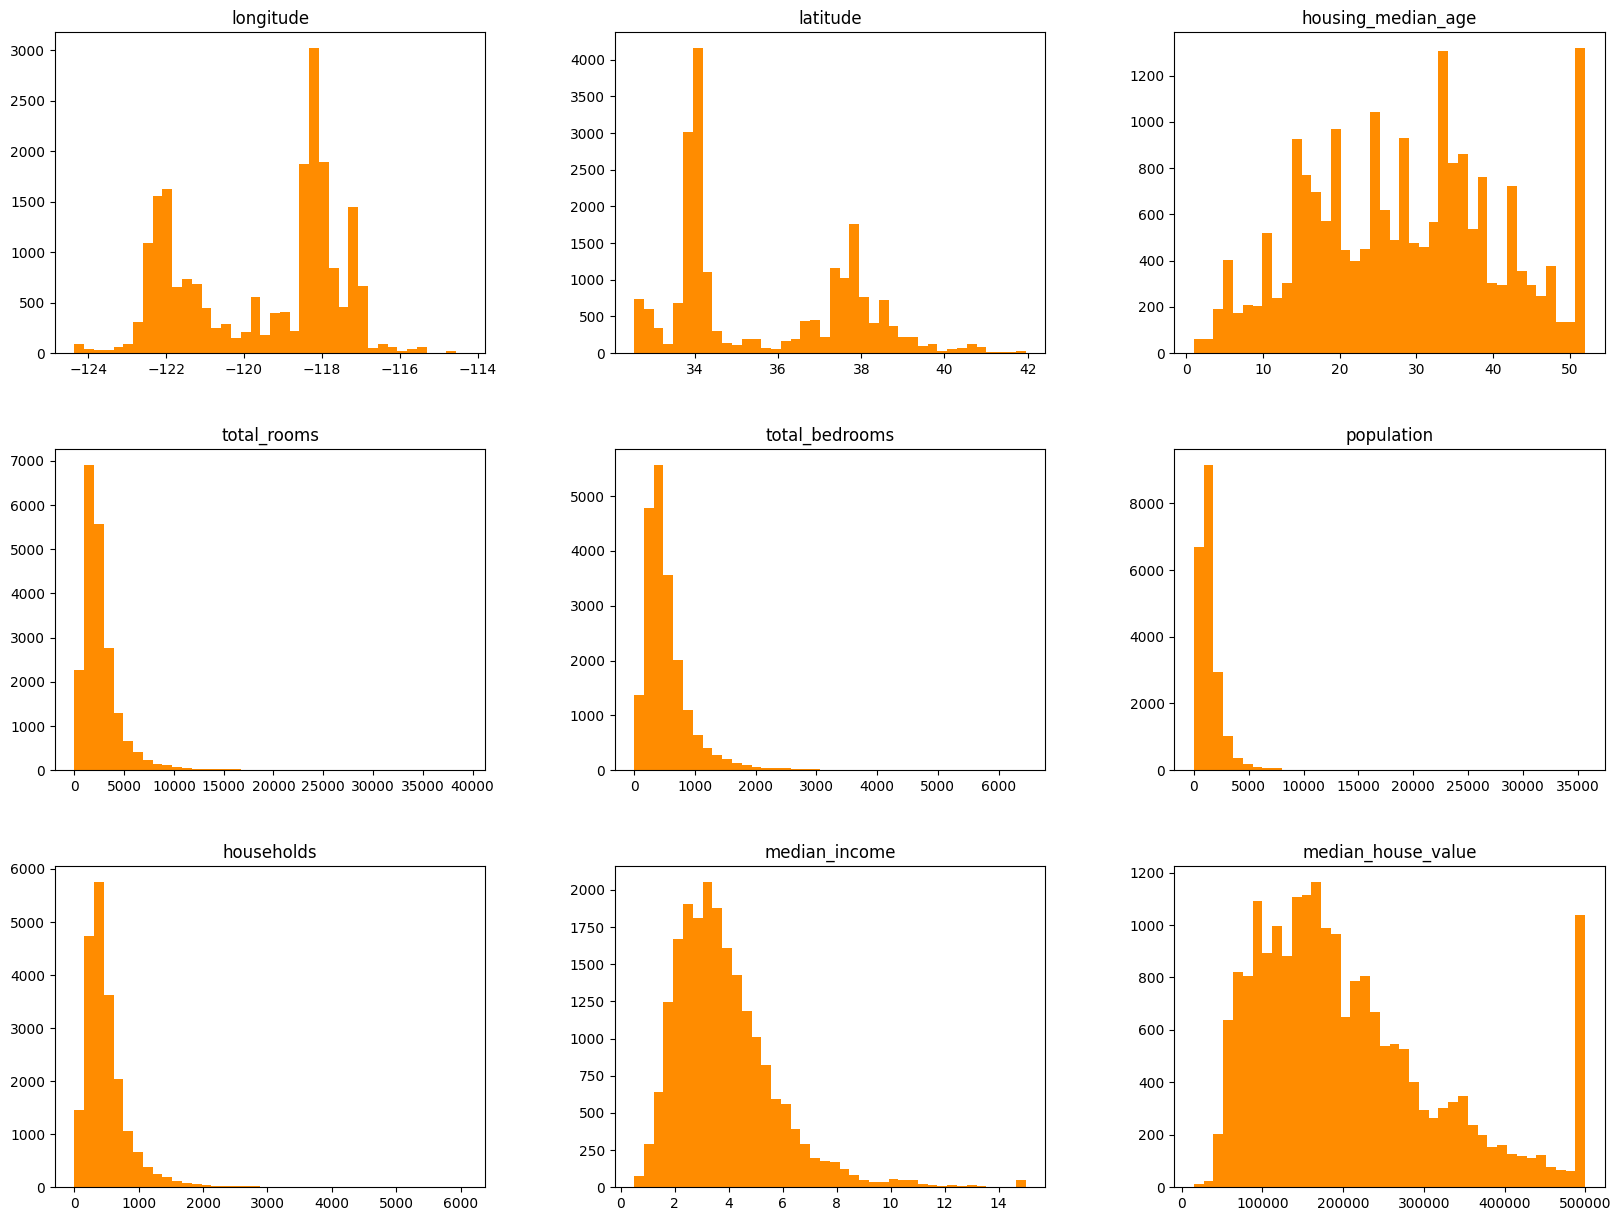

In [28]:
df.hist(bins=40, figsize=(20, 15), grid=False, color='darkorange');

### 2.2) Correlation Matrix

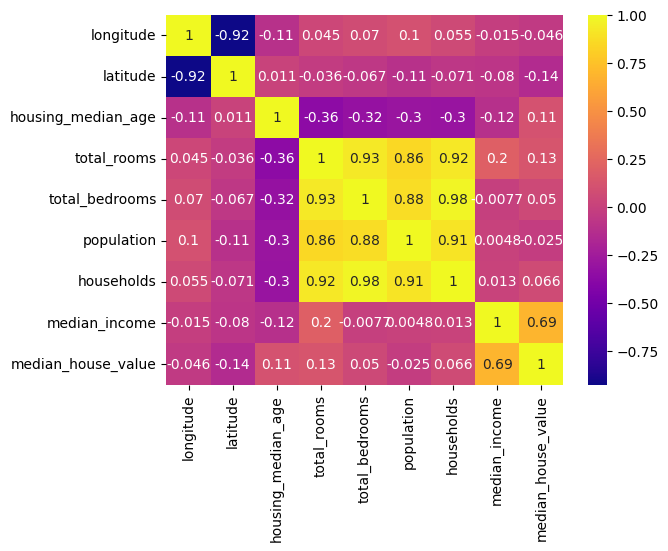

In [27]:
sns.heatmap(df.loc[:, df.columns != 'ocean_proximity'].corr(), annot=True, cmap="plasma")

There is a strong correlation between the features: `total_rooms`, `households`, `population` and `total_bedrooms`. The respective features can be processed to create more useful features.

In [21]:
df['rooms_per_household']=df['total_rooms']/df['households']
df['bedrooms_per_room']=df['total_bedrooms']/df['total_rooms']
df['population_per_household']=df['population']/df['households']

df = df.drop(columns = ["total_rooms", "total_bedrooms", "population"], axis=1)

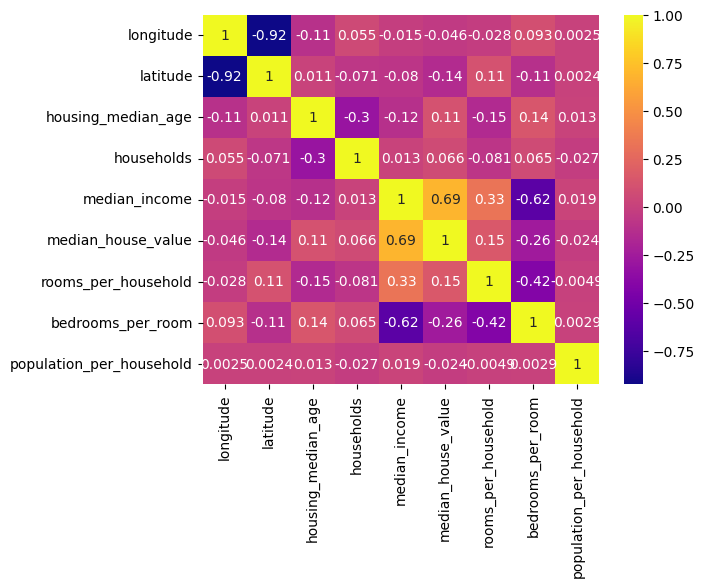

In [24]:
sns.heatmap(df.loc[:, df.columns != 'ocean_proximity'].corr(), annot=True, cmap="plasma")

In [13]:
# Correlation between the median_house_value and the other features

df.loc[:, df.columns != 'ocean_proximity'].corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
housing_median_age          0.105623
households                  0.065843
population_per_household   -0.023737
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

### 2.3) Visualization on California Map

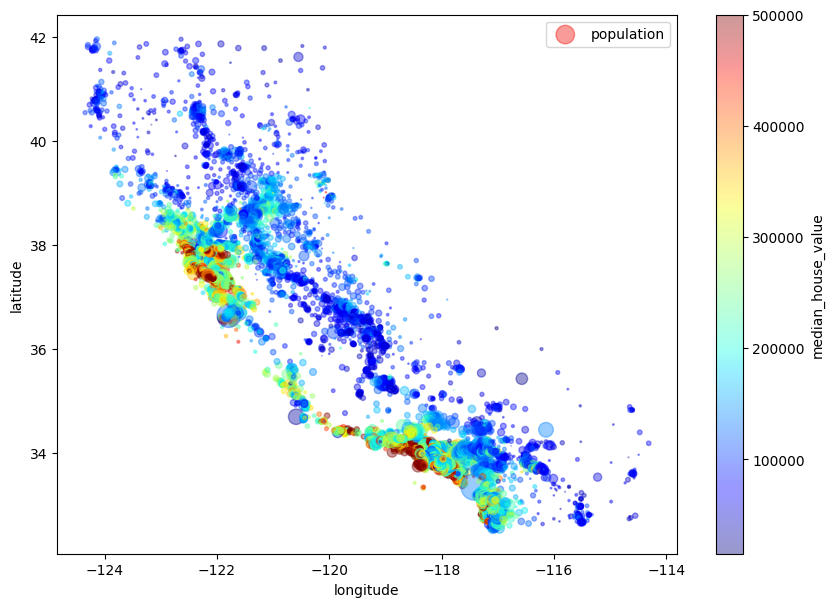

In [9]:
df.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=df["population"]/100, label="population", figsize=(10,7),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

The plot shows that some blocks around Bay Area and LA have high median house values.